Start


Checking category: D:/dataset/testing_vdo\violence

Processing video: V_10.mp4
Predicted: violence (0.51), Actual: violence

Processing video: V_100.mp4
Predicted: violence (0.70), Actual: violence

Processing video: V_101.mp4
Predicted: violence (1.00), Actual: violence

Processing video: V_102.mp4
Predicted: violence (0.99), Actual: violence

Processing video: V_103.mp4
Predicted: violence (0.99), Actual: violence

Processing video: V_104.mp4
Predicted: violence (0.96), Actual: violence

Processing video: V_105.mp4
Predicted: violence (0.94), Actual: violence

Processing video: V_106.mp4
Predicted: violence (0.97), Actual: violence

Processing video: V_107.mp4
Predicted: violence (0.95), Actual: violence

Processing video: V_108.mp4
Predicted: violence (0.96), Actual: violence

Processing video: V_109.mp4
Predicted: violence (0.97), Actual: violence

Processing video: V_11.mp4
Predicted: violence (0.84), Actual: violence

Processing video: V_110.mp4
Predicted: violence (0.92), Actual

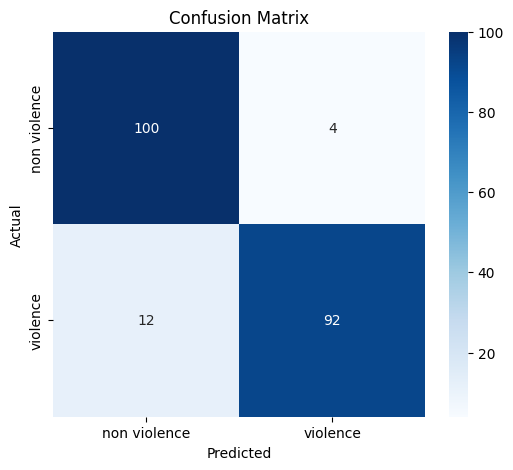


Classification Report:
              precision    recall  f1-score   support

non violence       0.89      0.96      0.93       104
    violence       0.96      0.88      0.92       104

    accuracy                           0.92       208
   macro avg       0.93      0.92      0.92       208
weighted avg       0.93      0.92      0.92       208



In [1]:
import cv2
import numpy as np
import os
import time
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

print("Start")

# Function to extract frames from a video
def extract_frames(video_path, frame_size=(224, 224)):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, frame_size)
        frame = frame / 255.0  # Normalize
        frames.append(frame)
    cap.release()
    return np.array(frames)

# Function to predict violence in frames
def predict_violence(frames, model):
    if len(frames) == 0:
        return 0
    frames = np.expand_dims(frames, axis=0) if len(frames.shape) == 3 else frames
    predictions = model.predict(frames, batch_size=10, verbose=0)
    return np.mean(predictions)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluation function
def evaluate_model(video_folder, model):
    total_videos = 0
    correct_predictions = 0
    all_predictions = []
    all_actuals = []
    inference_times = []

    label_map = {"violence": 1, "non violence": 0}

    for category in ["violence", "non violence"]:
        category_path = os.path.join(video_folder, category)
        print(f"Checking category: {category_path}")
        if not os.path.isdir(category_path):
            print(f"Folder not found: {category_path}")
            continue
        
        for video_name in os.listdir(category_path):
            if not video_name.endswith(('.mp4', '.avi', '.mov')):
                continue

            video_path = os.path.join(category_path, video_name)
            total_videos += 1
            print(f"\nProcessing video: {video_name}")

            frames = extract_frames(video_path)

            # Measure inference time
            start_time = time.time()
            avg_prediction = predict_violence(frames, model)
            end_time = time.time()

            inference_time = (end_time - start_time) * 1000  # in ms
            inference_times.append(inference_time)

            predicted_class = 1 if avg_prediction > 0.5 else 0
            actual_class = label_map[category]

            print(f"Predicted: {'violence' if predicted_class == 1 else 'non violence'} ({avg_prediction:.2f}), Actual: {'violence' if actual_class == 1 else 'non violence'}")

            all_predictions.append(predicted_class)
            all_actuals.append(actual_class)

            if predicted_class == actual_class:
                correct_predictions += 1

    if total_videos == 0:
        print("No valid videos found.")
        return

    # Metrics
    accuracy = accuracy_score(all_actuals, all_predictions)
    precision = precision_score(all_actuals, all_predictions)
    recall = recall_score(all_actuals, all_predictions)
    f1 = f1_score(all_actuals, all_predictions)
    avg_inference_time = np.mean(inference_times)

    # Print Metrics
    print("\n--- Model Performance Report ---")
    print(f"Total Videos Evaluated: {total_videos}")
    print(f"Accuracy:  {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.3f}")
    print(f"Recall:    {recall:.3f}")
    print(f"F1 Score:  {f1:.3f}")
    print(f"Avg Inference Time per Video: {avg_inference_time:.2f} ms")

    # Confusion Matrix
    cm = confusion_matrix(all_actuals, all_predictions)
    labels = ['non violence', 'violence']
    plot_confusion_matrix(cm, labels)

    # Optional: Full classification report
    print("\nClassification Report:")
    print(classification_report(all_actuals, all_predictions, target_names=labels))

# Load model and evaluate
model = load_model('violence_detection_model_xception.h5')
video_folder = "D:/dataset/testing_vdo"
evaluate_model(video_folder, model)
